In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import numpy as np


plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
from IPython.display import display

In [4]:
df = pd.read_csv('data/df_add.csv')
df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000,0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.885364,0.0,0.0,0.001080,1,0:00:01,5.698533,1
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.713378,0.0,0.0,0.002112,2,0:00:02,5.446287,1
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.560057,0.0,0.0,0.003102,3,0:00:03,5.221417,1
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.451406,0.0,0.0,0.004339,4,0:00:04,6.528729,1


# Segments
 ### I want to assign a grade designation by some unit of distance (15 ft?  15 seconds? or consistant grade sticks together whether long or short?)
 
 ### I want to create segments @ natural stopping points (roads/lights/aid stations) where speed is close to 0. 
 ### do segments first, then get rid of the stopped areas (or just label them differently and can sum moving time by count and get "seconds
 ### cycle between moving seg1, stopped segment (i.e. time spent at aid or at light) and then after a stop then seg2 , and so on.

In [5]:
df.tail()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
59635,2021-12-05 04:07:14+00:00,38.575911,-77.412909,38.400002,"(38.57591092586517, -77.41290858015418, 38.400...",0.000567,0.000567,2.042280,0.0,-59.599998,67.018825,59635,16:33:55,2.995344,1
59636,2021-12-05 04:07:15+00:00,38.575905,-77.412903,38.400002,"(38.575905142351985, -77.41290304809809, 38.40...",0.000499,0.000499,1.795929,0.0,-59.599998,67.019324,59636,16:33:56,2.634029,1
59637,2021-12-05 04:07:16+00:00,38.575900,-77.412897,38.400002,"(38.57589961029589, -77.41289709694684, 38.400...",0.000499,0.000499,1.797992,0.0,-59.599998,67.019823,59637,16:33:57,2.637056,1
59638,2021-12-05 04:07:17+00:00,38.575893,-77.412893,38.400002,"(38.57589282095432, -77.41289340890944, 38.400...",0.000509,0.000510,1.832786,0.0,-59.599998,67.020333,59638,16:33:58,2.688086,1
59639,2021-12-05 04:07:18+00:00,38.575885,-77.412891,38.400002,"(38.57588494196534, -77.41289131343365, 38.400...",0.000555,0.000556,1.998668,0.0,-59.599998,67.020889,59639,16:33:59,2.931379,1


In [6]:
full_miles = df['distance'].sum()//1
full_miles

67.0

In [7]:
def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return [lowerneighbour_ind, upperneighbour_ind] 

junder,jover = find_neighbours(1,df,'cum_distance')
df[junder:jover+1]


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
897,2021-12-04 11:46:00+00:00,38.582123,-77.411852,76.199997,"(38.58212267048657, -77.41185246035457, 76.199...",0.001544,0.001540,5.557706,-0.200005,-21.800003,0.998869,897,0:14:57,8.151302,1
898,2021-12-04 11:46:01+00:00,38.582141,-77.411861,75.800003,"(38.582141026854515, -77.41186109371483, 75.80...",0.001371,0.001351,4.935103,-0.399994,-22.199997,1.000220,898,0:14:58,7.238152,1


In [8]:
print(df['cum_distance'][junder]//1)
print(df['cum_distance'][jover]//1)


0.0
1.0


In [9]:
# add mile indicators -stance?
def make_miles(row):
    return row['cum_distance']//1 +1
df['mile_num'] = df.apply(make_miles, axis=1)
df['mile_num'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68.])

In [10]:
df[df['mile_num'] == 9]['second'].count()

797

In [11]:
# time_by_mile
def mile_time(mile):
    seconds = int(df[df['mile_num'] == mile]['second'].count())
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
mile_time(1)

'0:14:58'

In [12]:

def run_miles(df):
    mile_analysis=[]        
    for i in df['mile_num'].unique():
        if i == 0:
            continue
        else:
            mile_analysis.append(mile_time(i))
    return mile_analysis
    

In [14]:
def mile_marker_loc(df):
    mile_markers = []

    for i in range(1,len(df['mile_num'].unique())):
        junder,jover  = find_neighbours(i, df, 'cum_distance')
        mile_markers.append(jover)
    return mile_markers

In [17]:
def section_distance(df,unit):
    return df['cum_distance']//unit +1

df['grade_section'] = df.apply(section_distance,unit=.1, axis=1)


In [18]:
def grade_marker_loc(df):
    grade_markers = []
    for i in range(1,len(df['grade_section'].unique())):
        junder,jover  = find_neighbours(i/10, df, 'cum_distance')
        grade_markers.append(jover)
    return grade_markers



In [19]:
unit = 0.1
prev = df['elevation'][0]
conversion_factor = 0.62137119
gradient =[]

for i in range(len(df['grade_section'].unique())):
    el_diff = df['elevation'][i] - prev
    unit_gradient = el_diff/(unit/conversion_factor*1000)
    gradient.append(unit_gradient)
    prev = df['elevation'][i]

gradient[0:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0012427234172562526,
 0.0012427708241156646,
 0.0,
 0.0012427234172561641,
 0.0]

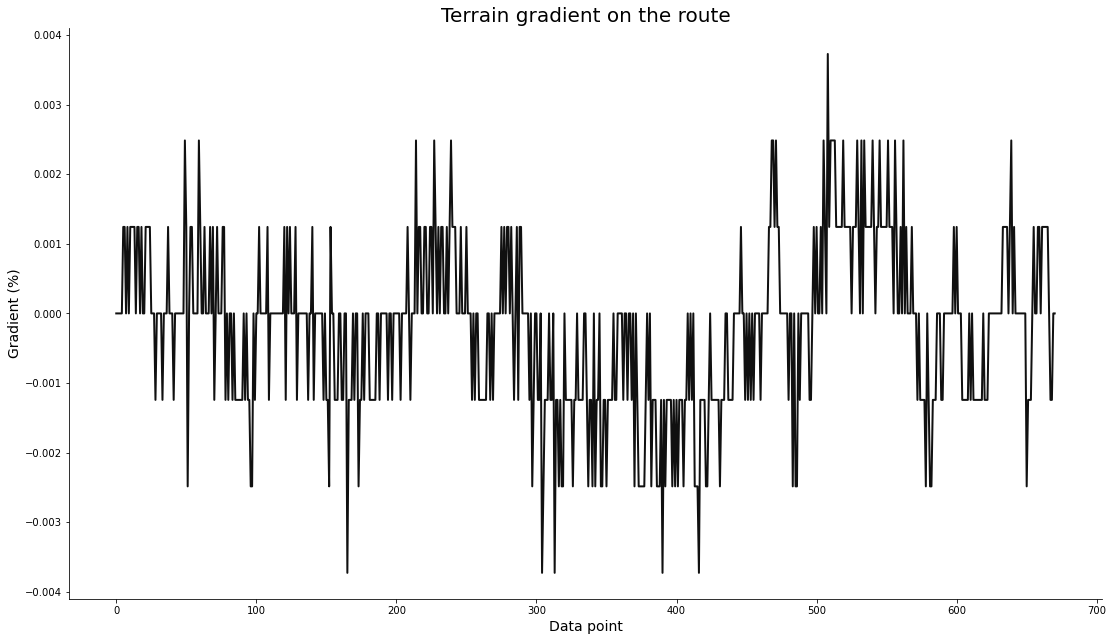

In [20]:


plt.figure(figsize=(18.5, 10.5))
plt.title('Terrain gradient on the route', size=20)
plt.xlabel('Data point', size=14)
plt.ylabel('Gradient (%)', size=14)
plt.plot(np.arange(len(gradient)), gradient, lw=2, color='#101010');

In [21]:
mile_marker_loc(df)

[898,
 1663,
 2434,
 3123,
 3848,
 4645,
 5334,
 6026,
 6823,
 7483,
 8175,
 8966,
 9664,
 10448,
 11138,
 11892,
 12650,
 13405,
 14155,
 14969,
 15802,
 16524,
 17364,
 18339,
 19700,
 20624,
 21509,
 22356,
 23210,
 24196,
 25009,
 25755,
 26526,
 27412,
 28346,
 29132,
 29966,
 30829,
 31793,
 32588,
 33487,
 34438,
 35291,
 36236,
 37136,
 38510,
 39513,
 40542,
 41472,
 42509,
 43454,
 44463,
 45299,
 46248,
 47290,
 48170,
 49228,
 50133,
 51049,
 52057,
 53197,
 54147,
 55147,
 56195,
 57296,
 58390,
 59568]

In [22]:
from folium.features import DivIcon

def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(150,36),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html="""<span class="fa-stack " style="font-size: 12pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {:02d}  
                    </strong>
                </span>""".format(color,number)
        )
    return icon
    
col_hex = ['#440154',
 '#481a6c',
 '#472f7d',
 '#414487',
 '#39568c',
 '#31688e',
 '#2a788e',
 '#23888e',
 '#1f988b',
 '#22a884',
 '#35b779',
 '#54c568',
 '#7ad151',
 '#a5db36',
 '#d2e21b']

In [23]:
route_map = folium.Map(
    location=[38.778, -77.05],
    zoom_start=14,
    tiles='OpenStreetMap',
    width= 600,
    height=600
)
coordinates = [tuple(x) for x in df[['latitude','longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

locations_to_chart = mile_marker_loc(df)
mile_times = run_miles(df)
num =0
mile=1
for i in locations_to_chart:
    loc = [df['latitude'][i], df['longitude'][i]]
    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile),
        icon=folium.Icon(color='white',icon_color='white'),
        markerColor=col_hex[mile]
    ).add_to(route_map)

    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile)+ " "+ mile_times[mile-1],
        icon= number_DivIcon(col_hex[mile],mile)
    ).add_to(route_map)
    mile+=1



display(route_map)

IndexError: list index out of range

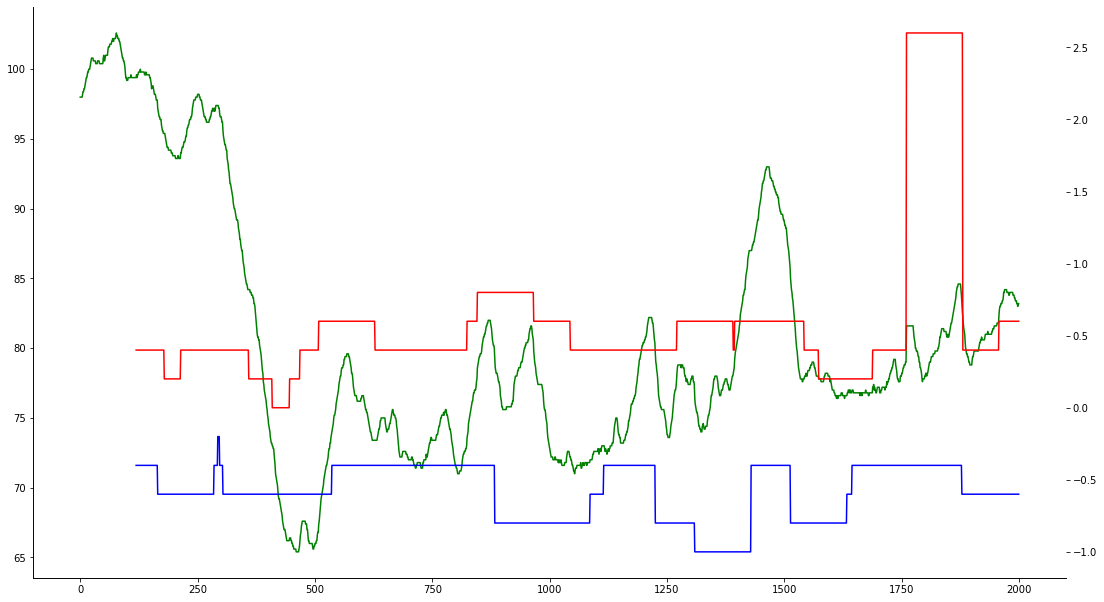

In [24]:
# Experiment with mean max and min on rolling elevation change
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).max()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).min()[0:2000], c='b')



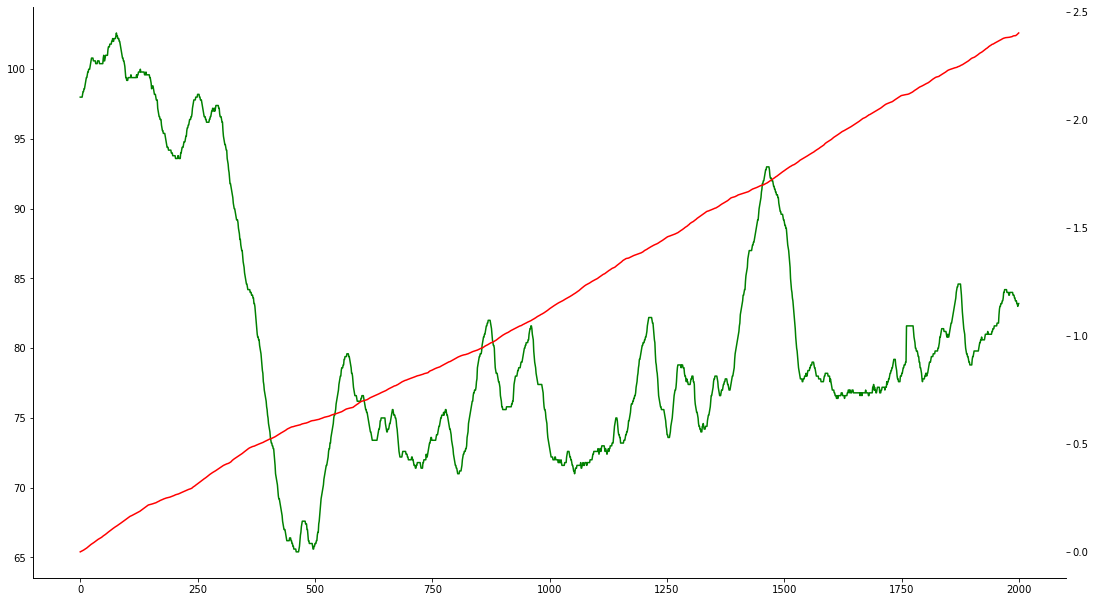

In [25]:
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['cum_distance'][0:2000], c='r')

In [26]:
df.to_csv('data/df_mile.csv', index=False)
df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time,mile_num,grade_section
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000,0,1.0,1.0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.885364,0.0,0.0,0.001080,1,0:00:01,5.698533,1,1.0,1.0
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.713378,0.0,0.0,0.002112,2,0:00:02,5.446287,1,1.0,1.0
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.560057,0.0,0.0,0.003102,3,0:00:03,5.221417,1,1.0,1.0
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.451406,0.0,0.0,0.004339,4,0:00:04,6.528729,1,1.0,1.0
